<a href="https://colab.research.google.com/github/Youga19/youga/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 2.3 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=a7556a373a27e43b6c890c8c35804e5c65fe9751220ac505c59eae2f9e4934cc
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect

In [ ]:
keywords=['Jokowi']
start="2022–08–01"
end ="2022–10–15"
max_num=100
fname='tweet.json' 
languages=['id','en']

In [ ]:
import pandas as pd
datatw=[]

In [ ]:
for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
            datatw.append(tweet.content)
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                print(line)
                f.write(line)
                f.write('\n')

{"id": 1582369766055952384, "username": "wondo_shati", "date": "2022-10-18 13:55:25+00:00", "text": "@HusinShihab @jokowi @Syarman59 @ChusnulCh__ @Madebylaluna @GunRomli @sjahtie @pn7l7h @Uki23 @pengarang_sajak @Aryprasetyo85 @ex_AnakLolina Namanya juga orang sarap", "url": "https://twitter.com/wondo_shati/status/1582369766055952384"}
{"id": 1582369647042887681, "username": "BennySultanHas1", "date": "2022-10-18 13:54:57+00:00", "text": "@OposisiCerdas Dalam Politik Tidak ada jaminan 100% .... Untuk menjalankan janji2... Contohnya baik Pak Jokowi &amp; pak Prabowo...????", "url": "https://twitter.com/BennySultanHas1/status/1582369647042887681"}
{"id": 1582369616960974850, "username": "Banyu2703", "date": "2022-10-18 13:54:50+00:00", "text": "@hyang_wisnu @kemkominfo @jokowi @PlateJohnny @Aryprasetyo85 @03__nakula @DS_yantie @FirzaHusainID @miicies @farrel27 Kebutuhan akan talenta digital di Indonesia masih tinggi, dan dukungan berbagai pihak sangatlah penting.\n@kemkominfo @PlateJohnny

In [ ]:
datatw

['@HusinShihab @jokowi @Syarman59 @ChusnulCh__ @Madebylaluna @GunRomli @sjahtie @pn7l7h @Uki23 @pengarang_sajak @Aryprasetyo85 @ex_AnakLolina Namanya juga orang sarap',
 '@OposisiCerdas Dalam Politik Tidak ada jaminan 100% .... Untuk menjalankan janji2... Contohnya baik Pak Jokowi &amp; pak Prabowo...????',
 '@hyang_wisnu @kemkominfo @jokowi @PlateJohnny @Aryprasetyo85 @03__nakula @DS_yantie @FirzaHusainID @miicies @farrel27 Kebutuhan akan talenta digital di Indonesia masih tinggi, dan dukungan berbagai pihak sangatlah penting.\n@kemkominfo @PlateJohnny',
 '@DeepBlackCoffee @Syarman59 @Humaira922 @jokowi Nanti alasannya kan HIR buatan kapir Bang wkwkwkwkwkwkwk',
 '@HusinShihab @jokowi @Syarman59 @ChusnulCh__ @Madebylaluna @GunRomli @sjahtie @pn7l7h @Uki23 @pengarang_sajak @Aryprasetyo85 @ex_AnakLolina Egi Sujana itu Pembenci Jokowi sejak Pilpres 2014, dia dendam &amp; sakit hati sama Jokowi karna kelompoknya kalah Pilpres 2014 &amp; 2019. \nDari 2014 dia sering teriak2 People Power dan

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.4 MB/s 


In [ ]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
documents_clean=[]

for d in datatw:

    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove URL
    document_test = re.sub(r'http\S+', '', document_test)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)

    outputstem= stemmer.stem(d)
    d= stopword.remove(outputstem)
    documents_clean.append(outputstop)

In [ ]:
documents_clean[0:5]

[' namanya juga orang sarap',
 ' dalam politik tidak ada jaminan untuk menjalankan janji contohnya baik pak jokowi amp pak prabowo ',
 ' kebutuhan akan talenta digital di indonesia masih tinggi dan dukungan berbagai pihak sangatlah penting ',
 ' nanti alasannya kan hir buatan kapir bang wkwkwkwkwkwkwk',
 ' egi sujana itu pembenci jokowi sejak pilpres dia dendam amp sakit hati sama jokowi karna kelompoknya kalah pilpres amp dari dia sering teriak people power dan melakukan segala cara untuk melengserkan jokowi di dia ditangkap dan jadi tersangka kasus makar']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

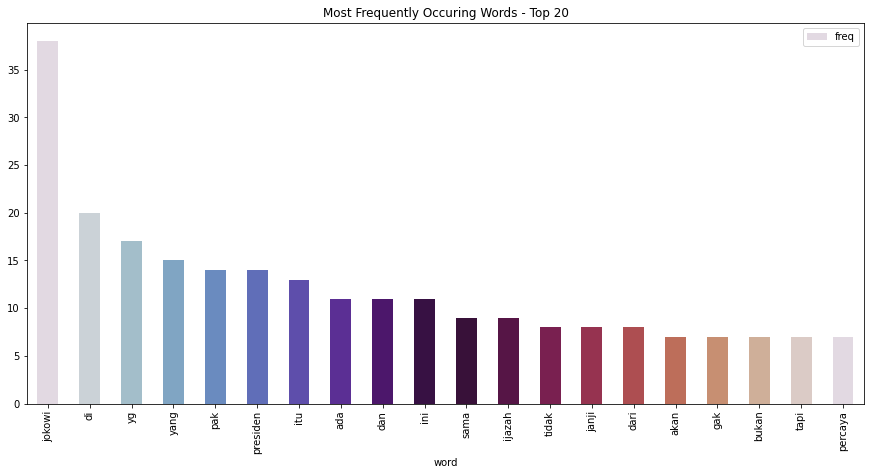

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

In [14]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [15]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 aamiin
 walafiat
 sukses
 kaban
 slmt
 sht
 semoga
 pendampingdesainspiratif
 selalu
 tppjawatimur
Cluster 1:
 jokowi
 di
 yg
 yang
 pak
 presiden
 itu
 ada
 ini
 dan
Cluster 2:
 jokowi
 dia
 dan
 baik
 pilpres
 amp
 akan
 saya
 di
 people




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
print("Prediction")
Y = cv.transform(["piala dunia"])
prediction = model.predict(Y)
print("Cluster number :", prediction)
Y = cv.transform(["ronaldo"])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Prediction
Cluster number : [1]
Cluster number : [1]


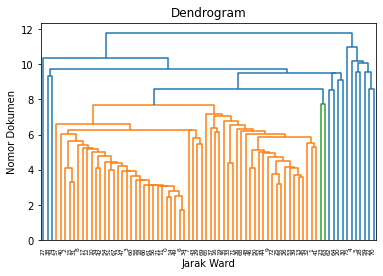

In [17]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

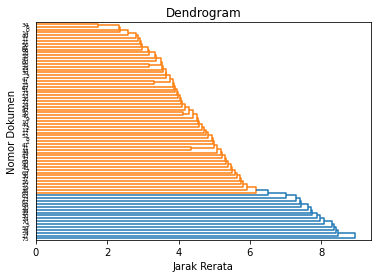

In [18]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()

In [19]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X) 
print(cluster.labels_)

[0 0 0 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 3 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 5]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


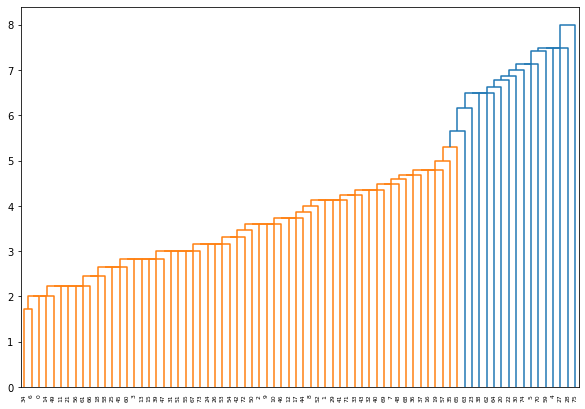

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(0, len(cluster.labels_))

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

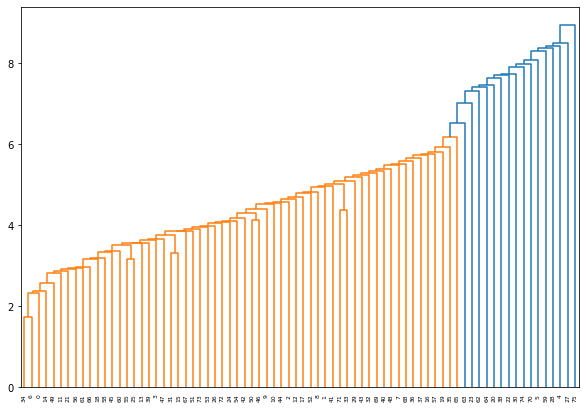

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'average')

labelList = range(0, len(cluster.labels_))

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True);
plt.show()